In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Student.csv")

In [4]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [5]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [6]:
df.duplicated().sum()

0

In [7]:
X=df.drop('GradeClass',axis=1)
y=df['GradeClass']

In [14]:
feature_names = X.columns

In [8]:
df['GradeClass'].value_counts(normalize=True)

GradeClass
4.0    0.506271
3.0    0.173077
2.0    0.163462
1.0    0.112458
0.0    0.044732
Name: proportion, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [11]:
lr=LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion_matrix_basic 
 [[  0   9   5   3   4]
 [  1  18  29   4   2]
 [  0  10  53  11   4]
 [  0   2  32  14  35]
 [  0   2   4   3 234]]



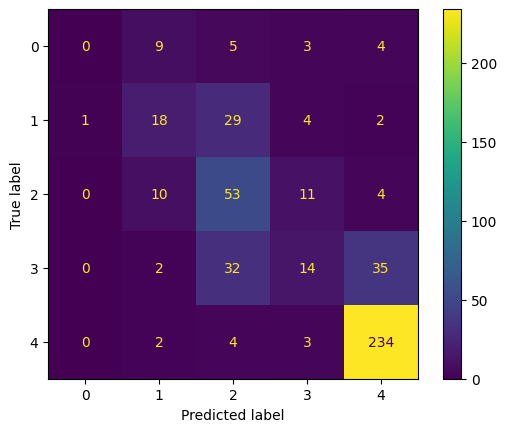

In [12]:
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [16]:
coefficients = lr.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
}).sort_values(by='AbsCoefficient', ascending=False)

print(coef_df)

              Feature  Coefficient  AbsCoefficient
8     ParentalSupport     0.563257        0.563257
7            Tutoring     0.556667        0.556667
13                GPA     0.435703        0.435703
1                 Age    -0.398048        0.398048
9     Extracurricular     0.322690        0.322690
10             Sports     0.177131        0.177131
6            Absences    -0.145730        0.145730
4   ParentalEducation    -0.119710        0.119710
3           Ethnicity     0.114681        0.114681
2              Gender    -0.073361        0.073361
5     StudyTimeWeekly     0.036768        0.036768
12       Volunteering    -0.029671        0.029671
11              Music    -0.025974        0.025974
0           StudentID     0.000762        0.000762


In [ ]:
# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
# Top Influential Factor: Parental Support (+0.563) Students with significant parental support do better.

#  Tutoring (+0.557): Having access to tutoring improves performance.

#  Higher GPA (+0.436) correlates with better grades.

#  Age (-0.398): Older children in this sample tend to do slightly worse (perhaps due to being held back or other circumstances).

#  Extracurricular activities (+0.323) have a moderately good effect.

#  Participating in sports has a positive impact (+0.177).


In [ ]:
# Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?
# Choosing Features: # First, we removed the GradeClass target variable from feature matrix X while maintaining it in feature matrix Y. At first, all other elements were kept, such as demographic information (e.g., age, gender, ethnicity), academic indicators (e.g., GPA, StudyTimeWeekly, Absences), and support systems (e.g., tutoring, parental help). Despite being included, StudentID has no predictive value, as evidenced by its nearly 0 coefficient.

# Encoding Categorical Variables: Support activities, gender, ethnicity, and parental education were all previously encoded as numeric values (e.g., 0/1 or ordinal levels), negating the need for additional encoding (such as one-hot encoding).                                                                                                                    
# Scaling (Optional): # It's usually best to use a scaler to standardize features in logistic regression, particularly when dealing with different feature scales (such as Absences vs. GPA). Though it might improve model speed, this wasn't made clear in the code.

# Handling Multiple Classes: # The logistic regression model was set up using the multi_class='ovr' (one-vs-rest) method because the target GradeClass is multiclass, which allows it to make predictions across several grade categories.

# Evaluation of Feature Impact: Following training, we examined the model's coefficients to determine which features had the biggest influence on predictions. While age and absences had a negative effect, features like parental support, tutoring, and GPA had the biggest favorable effects.